# Problem Set 4
## Xuhui Bai

In [7]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import mglearn
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression


In [2]:
# Load dataset
alcohol = pd.read_csv("alcohol.csv")
# Remove squaredal terms - these terms i
alcohol.drop(['agesq','beertaxsq','cigtaxsq','ethanolsq','educsq'],axis=1,inplace=True)
alcohol.head()

,id,abuse,status,unemrate,age,educ,married,famsize,white,exhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
0,1,1,1,4.0,50,4,1,1,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,0,0
1,2,0,3,4.0,37,12,1,5,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
2,3,0,3,4.0,53,9,1,3,1,1,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
3,4,0,3,3.3,59,11,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,0,0,1,1
4,5,0,3,3.3,43,10,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,1,1,1,1


## Sample Rebalancing

In [32]:
# generate special classes for types
count0, count1 = alcohol.abuse.value_counts()
aclass0 = alcohol[alcohol.abuse==0]
aclass1 = alcohol[alcohol.abuse==1]


# under sampling
# Generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
alcoholus = pd.concat([under0,aclass1],axis=0)


# set up data, standardize data, and check if balanced
y = alcoholus.abuse
X = alcoholus.iloc[:,2:33]
print(np.mean(y))
scaler = preprocessing.StandardScaler().fit(X)
X_standard = scaler.transform(X)
X.head()

0.5


,status,unemrate,age,educ,married,famsize,white,exhealth,vghealth,goodhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
856,3,7.3,55,12,1,4,1,0,0,1,...,0,0,0.446,20.5,1.91736,0,0,0,1,1
877,3,6.8,33,12,1,4,1,0,0,1,...,0,0,0.158,20.0,2.12700,0,0,0,1,1
2318,3,6.0,27,12,0,3,0,1,0,0,...,0,0,0.360,14.0,1.73238,0,0,0,1,1
1255,3,5.1,51,8,1,8,1,0,1,0,...,0,0,0.240,18.0,1.79757,0,0,0,1,1
1676,3,5.0,53,12,1,1,1,1,0,0,...,0,0,1.440,24.0,2.60184,0,0,0,1,1


### 1. Logistic regression. 
### In this case do a parameter search over Clist = np.power(10.,range(-5,10)). For logistic regression you should be following standard practice by standardizing your data with the StandardScaler(). Since this is a simple one dimensional search, generate a plot of your mean test score accuracy versus C.

In [6]:
def traintest(nmc,modelObj,X,y,testFrac):
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train) 
        testScore[i]  = modelObj.score(X_test,y_test) 
    return trainScore, testScore 

In [33]:
Clist = np.power(10.0,range(-5,10))
train_performance = []
test_performance = []


for c in Clist:
    logreg = LogisticRegression(C=c, max_iter=2000, solver='lbfgs')
    trainScore, testScore = traintest(100, logreg, X_standard, y, 0.25)
    train_performance.append(np.mean(trainScore))
    test_performance.append(np.mean(testScore))


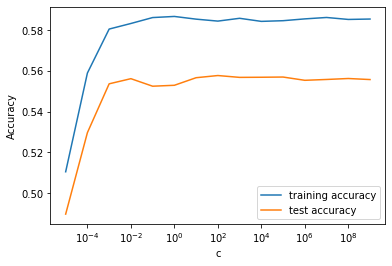

In [34]:
plt.semilogx(Clist, train_performance, label="training accuracy")
plt.semilogx(Clist, test_performance, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c")
plt.legend()

### 2. K nearest neighbors classification. 
### Use a range of neighbors of [10, 50, 100, 200, 300, 400, 500]. You should again use StandardScaler() to standardize your data. Again, generate a plot of test score performance against different neighbor sizes.

In [35]:
from sklearn.neighbors import KNeighborsClassifier


n_neighbor = [10, 50, 100, 200, 300, 400, 500]
train_performance_KNN = []
test_performance_KNN = []


for k in n_neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    trainScore_KNN, testScore_KNN = traintest(100, knn, X_standard, y, 0.25)
    train_performance_KNN.append(np.mean(trainScore_KNN))
    test_performance_KNN.append(np.mean(testScore_KNN))
    

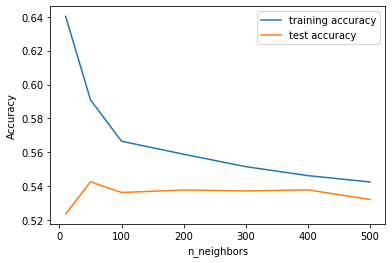

In [36]:
plt.plot(n_neighbor, train_performance_KNN, label="training accuracy")
plt.plot(n_neighbor, test_performance_KNN, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### 3. A random forest classifier. 
### In this case fix the number of trees at 100, but look at a range of max_features from 1 to 10, by 1, and tree depth from 2 to 10, by 2. No need for any rescaling in this case. (Why?) (No need for a plot here, since this would have to be three dimensional.)

In [45]:
from sklearn.ensemble import RandomForestClassifier


max_features = [1,2,3,4,5,6,7,8,9,10]
tree_depth = range(2,11,2)
train_performance_RF = []
test_performance_RF = []


for f in max_features:
    print('max_features = '+str(f)+":")
    for d in tree_depth:
        forest = RandomForestClassifier(n_estimators=100, max_depth=d, max_features=f)
        trainScore_RF, testScore_RF = traintest(100, forest, X, y, 0.25)
        print('    max_depth = '+str(d)+":")
        print('    Train R-squared mean: {:.4f}'.format(np.mean(trainScore_RF)))
        print('    Test R-squared mean: {:.4f}'.format(np.mean(testScore_RF)))
        
        

max_features = 1:
    max_depth = 2:
    Train R-squared mean: 0.5960
    Test R-squared mean: 0.5486
    max_depth = 4:
    Train R-squared mean: 0.6507
    Test R-squared mean: 0.5516
    max_depth = 6:
    Train R-squared mean: 0.7437
    Test R-squared mean: 0.5588
    max_depth = 8:
    Train R-squared mean: 0.8497
    Test R-squared mean: 0.5527
    max_depth = 10:
    Train R-squared mean: 0.9282
    Test R-squared mean: 0.5507
max_features = 2:
    max_depth = 2:
    Train R-squared mean: 0.6025
    Test R-squared mean: 0.5548
    max_depth = 4:
    Train R-squared mean: 0.6559
    Test R-squared mean: 0.5620
    max_depth = 6:
    Train R-squared mean: 0.7441
    Test R-squared mean: 0.5589
    max_depth = 8:
    Train R-squared mean: 0.8453
    Test R-squared mean: 0.5560
    max_depth = 10:
    Train R-squared mean: 0.9267
    Test R-squared mean: 0.5505
max_features = 3:
    max_depth = 2:
    Train R-squared mean: 0.6047
    Test R-squared mean: 0.5598
    max_depth = 4:
 